# Notebook for visualizations

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

from bokeh.plotting import figure, output_notebook, show
from IPython.display import display, Math
from scipy import optimize
from math import exp, cos, sqrt, pi, sin, sqrt
from typing import List

from src.OspitalettoDataset import OspitalettoDataset
from src.NOAA2010Dataset import NOAA2010Dataset

mypalette = sns.color_palette(['#51ffda']) # https://www.hsluv.org/
sns.set_palette(mypalette)

output_notebook()

Loading BokehJS ...

In [4]:
ospitaletto2019 = OspitalettoDataset()
noaa2010Dataset = NOAA2010Dataset()

AVAILABLE_DATASETS = dict()
AVAILABLE_DATASETS.update(ospitaletto2019.load_processed_data())
AVAILABLE_DATASETS.update(noaa2010Dataset.load_processed_data())
AVAILABLE_DATASETS

{'ospitaletto':                      air_temp  dayofyear  month  hourofyear  air_temp_fit  \
 timestamp                                                                   
 2019-01-01 00:00:00  9.100000          1      1           1      4.821755   
 2019-01-01 01:00:00  9.200000          1      1           2      4.818987   
 2019-01-01 02:00:00  9.166667          1      1           3      4.816225   
 2019-01-01 03:00:00  9.183333          1      1           4      4.813468   
 2019-01-01 04:00:00  8.916667          1      1           5      4.810717   
 ...                       ...        ...    ...         ...           ...   
 2019-12-30 20:00:00  0.733333        364     12        8733      4.835676   
 2019-12-30 21:00:00 -0.100000        364     12        8734      4.832881   
 2019-12-30 22:00:00 -0.250000        364     12        8735      4.830091   
 2019-12-30 23:00:00 -0.983333        364     12        8736      4.827307   
 2019-12-31 00:00:00 -0.800000        365     12 

## Important visualization functions

In [5]:
def visualize_on_same_row(data_list: List, ylabel: str, xlabel: str, suptitle: str):
    fig, axs = plt.subplots(nrows=1, ncols=5, sharey=True, figsize=(40,8), subplot_kw={"ylabel": ylabel, "xlabel": xlabel})
    
    axs[0].set_title('Miami, FL, USA')
    sns.lineplot(data=data_list[0], ax=axs[0])

    axs[1].set_title('Fresno, CA, USA')
    sns.lineplot(data=data_list[1], ax=axs[1])

    axs[2].set_title('Olympia, WA, USA')
    sns.lineplot(data=data_list[2], ax=axs[2])

    axs[3].set_title('Rochester, NY, USA')
    sns.lineplot(data=data_list[3], ax=axs[3])

    axs[4].set_title('Ospitaletto, Italy')
    sns.lineplot(data=data_list[4], ax=axs[4])

    fig.suptitle(suptitle)
    
    return fig, axs
    

## Visualization of curve fitting

In [9]:
ospitaletto = AVAILABLE_DATASETS[OspitalettoDataset.OSPITALETTO]

miami = AVAILABLE_DATASETS[NOAA2010Dataset.MIAMI_FL]
fresno = AVAILABLE_DATASETS[NOAA2010Dataset.FRESNO_CA]
olympia = AVAILABLE_DATASETS[NOAA2010Dataset.OLYMPIA_WA]
rochester = AVAILABLE_DATASETS[NOAA2010Dataset.ROCHESTER_NY]

(<Figure size 2880x576 with 5 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f1d988e20>,
       dtype=object))

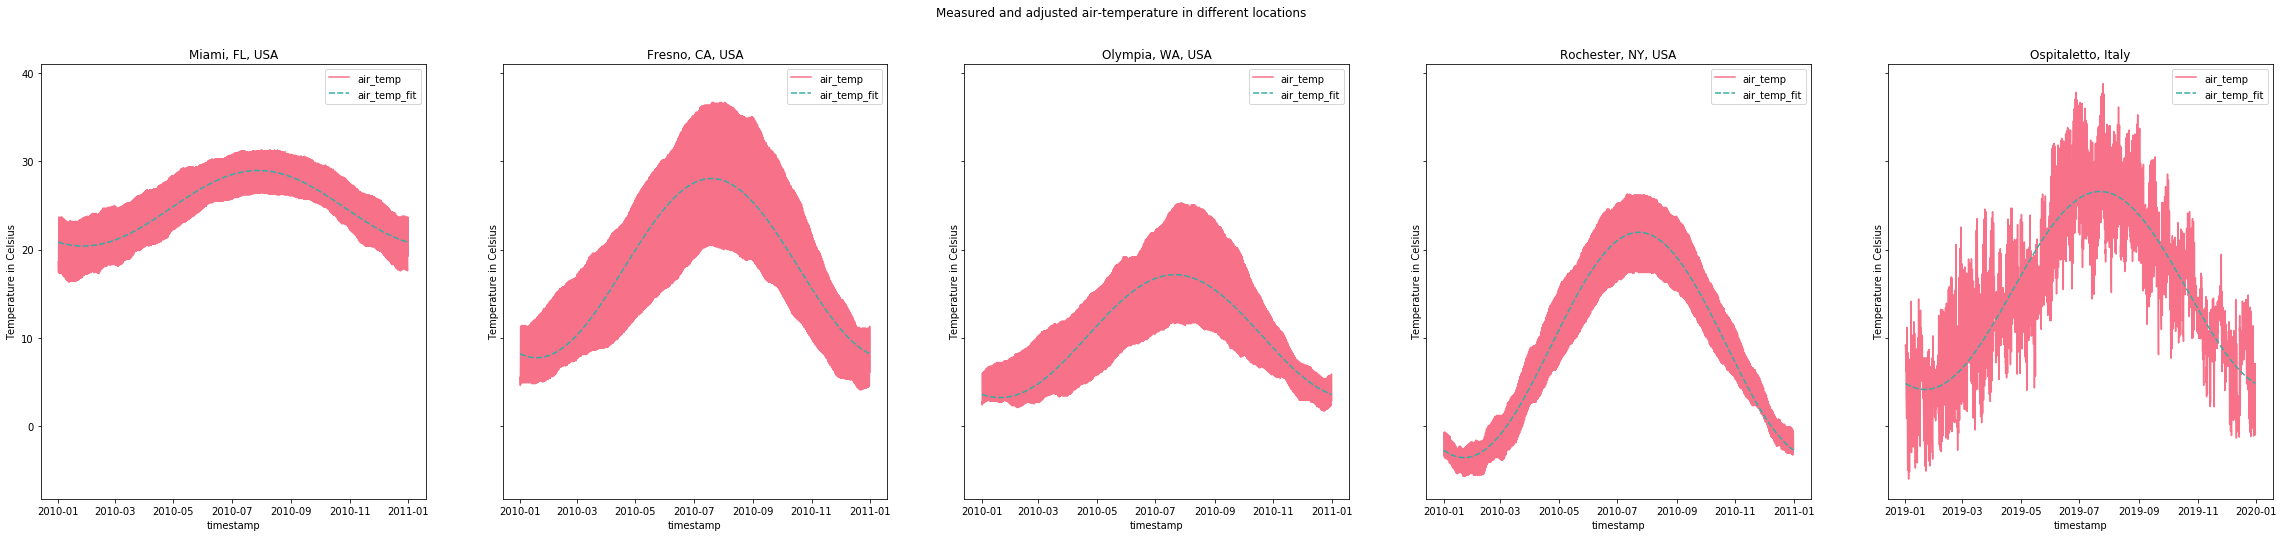

In [10]:
visualize_on_same_row(data_list=[miami[["air_temp", "air_temp_fit"]],
                                 fresno[["air_temp", "air_temp_fit"]],
                                 olympia[["air_temp", "air_temp_fit"]],
                                 rochester[["air_temp", "air_temp_fit"]],
                                 ospitaletto[["air_temp", "air_temp_fit"]]],
                      ylabel="Temperature in Celsius", 
                      xlabel="Date",
                      suptitle='Measured and adjusted air-temperature in different locations')

## Visualization of Air Temp, Ground Temp and Aquifer Temp

(<Figure size 2880x576 with 5 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f2189a0d0>,
       dtype=object))

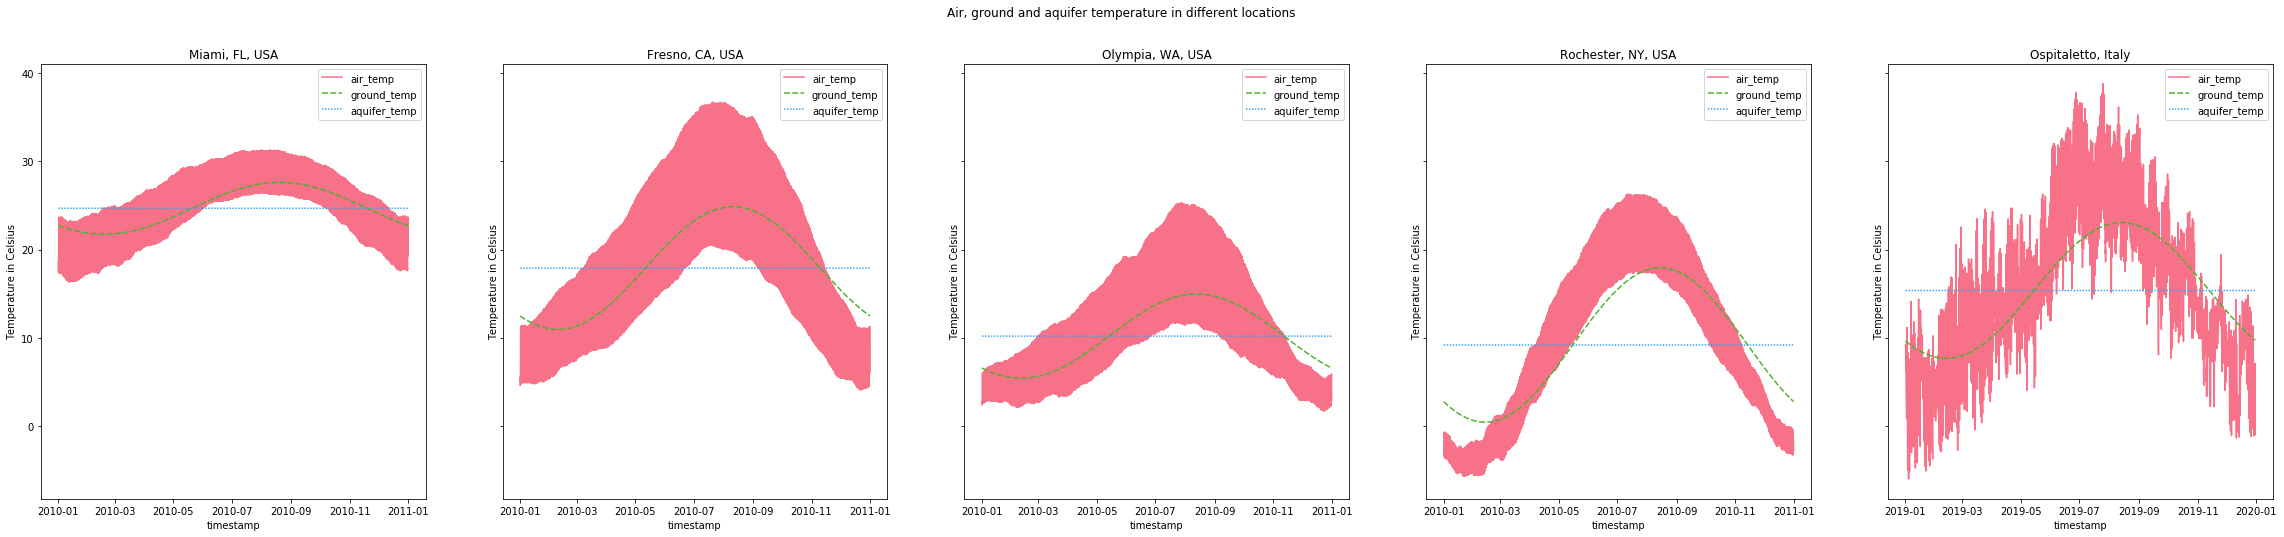

In [12]:
visualize_on_same_row(data_list=[miami[["air_temp", "ground_temp", "aquifer_temp"]],
                                 fresno[["air_temp", "ground_temp", "aquifer_temp"]],
                                 olympia[["air_temp", "ground_temp", "aquifer_temp"]],
                                 rochester[["air_temp", "ground_temp", "aquifer_temp"]],
                                 ospitaletto[["air_temp", "ground_temp", "aquifer_temp"]]],
                      ylabel="Temperature in Celsius", 
                      xlabel="Date",
                      suptitle='Air, ground and aquifer temperature in different locations')

## Visualization of Hot Water and Space Heating temperatures

### Whole year

(<Figure size 2880x576 with 5 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f21ab8850>,
       dtype=object))

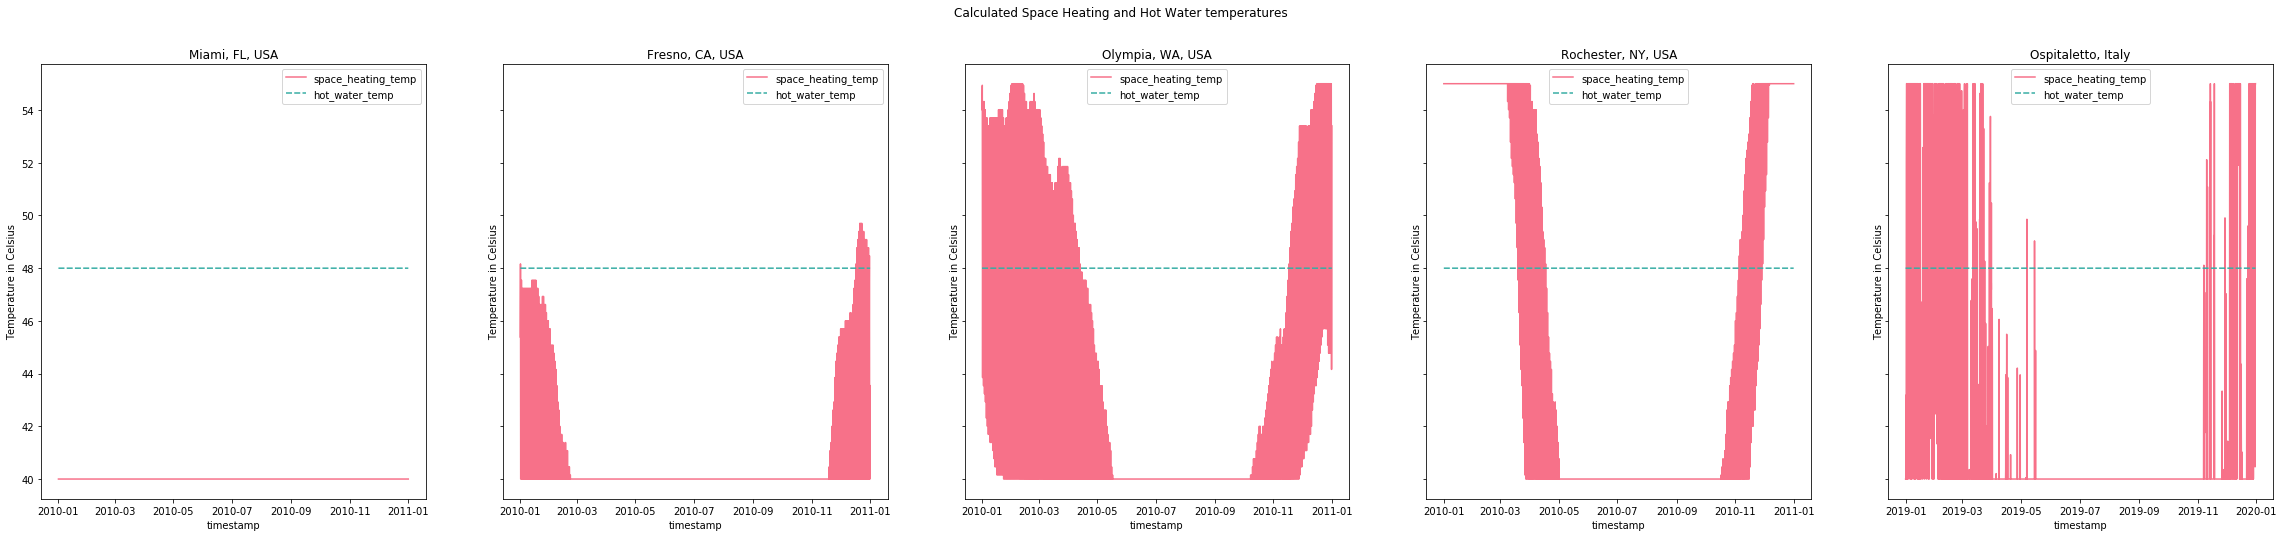

In [13]:
visualize_on_same_row(data_list=[miami[["space_heating_temp","hot_water_temp"]],
                                 fresno[["space_heating_temp","hot_water_temp"]],
                                 olympia[["space_heating_temp","hot_water_temp"]],
                                 rochester[["space_heating_temp","hot_water_temp"]],
                                 ospitaletto[["space_heating_temp","hot_water_temp"]]],
                      ylabel="Temperature in Celsius", 
                      xlabel="Date",
                      suptitle='Calculated Space Heating and Hot Water temperatures')

In [27]:
month = int(input("Enter month to analyze (values between 1 to 12): "))

Enter month to analyze (values between 1 to 12):  11


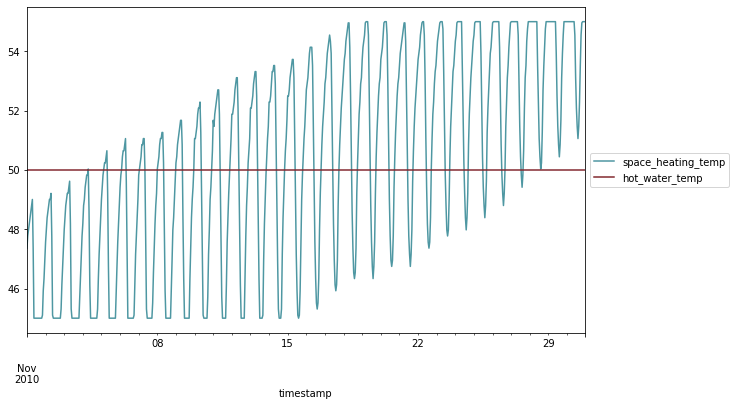

In [24]:
november_data = Tamb_hourly[Tamb_hourly.month == month ]
november_data[["space_heating_temp","hot_water_temp"]].plot(figsize=(10,6), color=["#4e97a2",'#82272e'])

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

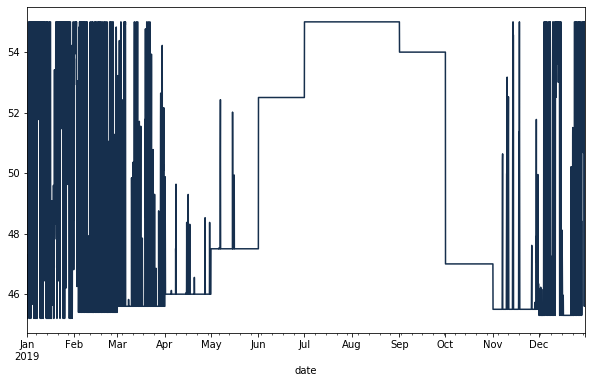

In [21]:
Tamb_hourly["user_temp"].plot(figsize=(10,6))

In [ ]:
november_data = Tamb_hourly[Tamb_hourly.index.month == 11 ]
november_data["Tuser"].plot(figsize=(10,6))

## Visualization of Net temperature

In [ ]:
Tamb_hourly[["net_temp"]][Tamb_hourly.index < "2010-01-31"].plot()

## Visualization of COP

In [ ]:
Tamb_hourly[['COP']].plot(figsize=(20,6))

## Visualization of Energy Loss

In [ ]:
Tamb_hourly[['E_loss_tot']].plot(figsize=(20,6))